<a href="https://colab.research.google.com/github/nguyenthanhphat-144/TTNT/blob/main/Tuan4_Bai1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install networkx matplotlib numpy

In [13]:
from google.colab import files

uploaded = files.upload()  # chọn file tại đây
filename = list(uploaded.keys())[0]
print("Đã chọn file:", filename)


Saving matrix.txt to matrix.txt
Đã chọn file: matrix.txt


In [14]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def read_adj_matrix(path: str) -> np.ndarray:
    """Đọc ma trận kề từ file txt.
    - Bỏ dòng trống
    - Bỏ dòng comment bắt đầu bằng '#'
    - Hỗ trợ phân cách bằng tab / space / dấu phẩy
    """
    rows = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith("#"):
                continue
            parts = line.replace(",", " ").split()
            rows.append([int(x) for x in parts])

    # kiểm tra hợp lệ
    n = len(rows[0])
    for i, r in enumerate(rows):
        if len(r) != n:
            raise ValueError(f"Hàng {i} không đúng kích thước.")

    return np.array(rows)


def build_graph(adj: np.ndarray) -> nx.Graph:
    """Tạo graph từ ma trận kề."""
    n = adj.shape[0]
    G = nx.Graph()
    G.add_nodes_from(range(n))

    # duyệt tam giác trên để không bị duplicate cạnh
    for i in range(n):
        for j in range(i + 1, n):
            if adj[i][j] or adj[j][i]:
                G.add_edge(i, j)
    return G


def color_graph(G: nx.Graph):
    """Tô màu đồ thị bằng greedy."""
    return nx.coloring.greedy_color(G, strategy="largest_first")


def draw_graph(G: nx.Graph, colors: dict):
    """Vẽ đồ thị ra màn hình cùng thông tin màu."""
    pos = nx.spring_layout(G, seed=42)
    cmap = plt.get_cmap("tab20")

    list_colors = list(colors.values())
    max_c = max(list_colors)

    node_color = [cmap(c / max_c) for c in list_colors]

    plt.figure(figsize=(8, 5))
    nx.draw(G, pos, with_labels=True, node_color=node_color, node_size=900)
    plt.title(f"Tổng số màu: {len(set(list_colors))}")
    plt.show()


=== Ma trận kề đã đọc ===
[[0 1 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [0 1 0 0]]

=== Kết quả tô màu ===
Đỉnh 0 → Màu 1
Đỉnh 1 → Màu 0
Đỉnh 2 → Màu 2
Đỉnh 3 → Màu 1


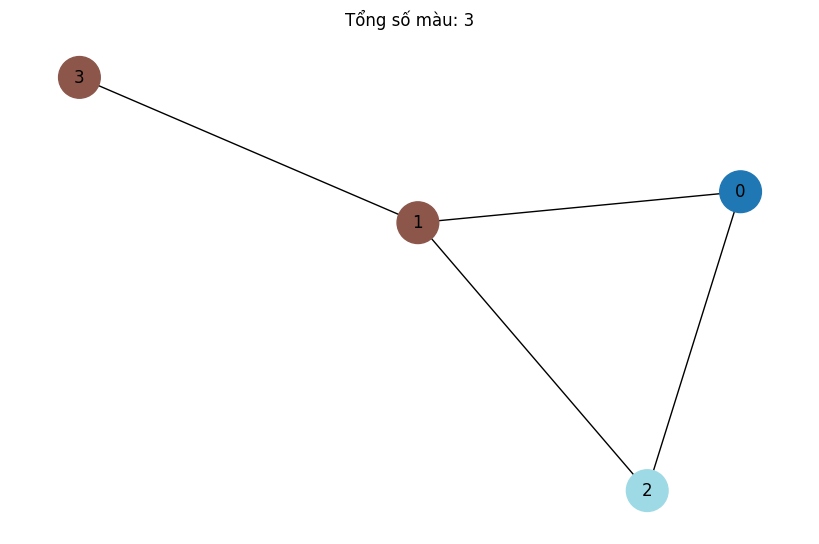

In [15]:
# đọc file upload
adj = read_adj_matrix(filename)

print("=== Ma trận kề đã đọc ===")
print(adj)

# tạo graph
G = build_graph(adj)

# tô màu
colors = color_graph(G)

print("\n=== Kết quả tô màu ===")
for node in sorted(colors):
    print(f"Đỉnh {node} → Màu {colors[node]}")

# hiển thị đồ thị
draw_graph(G, colors)
